Link: https://youtu.be/gK43gtGh49o?t=10943

In [1]:
%matplotlib inline 
import numpy as np 
import matplotlib.pyplot as plt

### Plotting the Cross Validation results 

In [3]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsRegressor

#generate toy dataset 
x = np.linspace(-3, 3, 100)
rng = np.random.RandomState(42)
y = np.sin(4 * x) + x + rng.normal(size = len(x))
X = x[:, np.newaxis]

cv = KFold(shuffle = True)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:426: FutureWarning: You should specify a value for 'n_splits' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(NSPLIT_WARNING, FutureWarning)


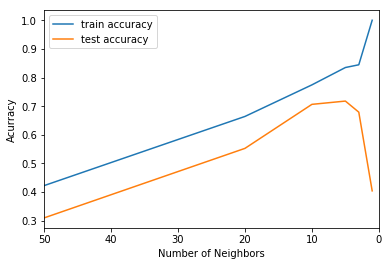

In [7]:
from sklearn.model_selection import validation_curve
n_neighbors = [1,3,5,10,20,50]
train_scores, test_scores = validation_curve(KNeighborsRegressor(), X, y, 
                                            param_range = n_neighbors, cv = cv, param_name = 'n_neighbors')
plt.plot(n_neighbors, train_scores.mean(axis = 1), label = 'train accuracy')
plt.plot(n_neighbors, test_scores.mean(axis = 1), label = 'test accuracy')
plt.ylabel('Acurracy')
plt.xlabel('Number of Neighbors')
plt.xlim([50, 0])
plt.legend(loc = 'best');

## Grid Search

In [9]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1, 1]}

grid = GridSearchCV(SVR(), param_grid = param_grid, cv= cv, verbose = 3, return_train_score = True)

In [10]:
grid.fit(X, y)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] C=0.001, gamma=0.001 ............................................
[CV]  C=0.001, gamma=0.001, score=-0.008043850450535572, total=   0.0s
[CV] C=0.001, gamma=0.001 ............................................
[CV] . C=0.001, gamma=0.001, score=-0.12970168859681253, total=   0.0s
[CV] C=0.001, gamma=0.001 ............................................
[CV] . C=0.001, gamma=0.001, score=-0.20391166985189035, total=   0.0s
[CV] C=0.001, gamma=0.01 .............................................
[CV] . C=0.001, gamma=0.01, score=-0.005962927626242287, total=   0.0s
[CV] C=0.001, gamma=0.01 .............................................
[CV] .. C=0.001, gamma=0.01, score=-0.12749033147327404, total=   0.0s
[CV] C=0.001, gamma=0.01 .............................................
[CV] ... C=0.001, gamma=0.01, score=-0.2018622060157782, total=   0.0s
[CV] C=0.001, gamma=0.1 ..............................................
[CV] .. C=0.001,

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ..... C=0.01, gamma=1, score=-0.013573138043307731, total=   0.0s
[CV] C=0.01, gamma=1 .................................................
[CV] ...... C=0.01, gamma=1, score=-0.13000082839429683, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ... C=0.1, gamma=0.001, score=0.017296099542755017, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ... C=0.1, gamma=0.001, score=-0.10036789678019042, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ... C=0.1, gamma=0.001, score=-0.17919148755583736, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ..... C=0.1, gamma=0.01, score=0.18165979981435054, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ..... C=0.1, gamma=0.01, score=0.07234526337119851, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.2s finished


GridSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=True),
       error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=3)

In [11]:
grid.predict(X) # uses model with best parameters automatically 

array([-1.79762875, -1.74054091, -1.71412904, -1.72272347, -1.76880247,
       -1.8527208 , -1.97255382, -2.12407501, -2.30087676, -2.49463429,
       -2.695503  , -2.89262935, -3.07474705, -3.23082299, -3.35071314,
       -3.42578612, -3.44947391, -3.41771237, -3.32924127, -3.18574205,
       -2.9918017 , -2.75470244, -2.48404785, -2.19124658, -1.88888388,
       -1.59001819, -1.30744475, -1.05297034, -0.8367425 , -0.66667333,
       -0.54799235, -0.4829551 , -0.4707249 , -0.50743515, -0.58642852,
       -0.69865919, -0.83323456, -0.97806438, -1.12057877, -1.24847261,
       -1.35043139, -1.41679516, -1.44012026, -1.41560488, -1.3413525 ,
       -1.21845724, -1.05090633, -0.84530623, -0.61045003, -0.35675398,
       -0.09559933,  0.16137852,  0.40300817,  0.61926205,  0.80185531,
        0.94472644,  1.04437082,  1.10000798,  1.11357463,  1.08954695,
        1.03460678,  0.95717608,  0.86685224,  0.7737823 ,  0.68801751,
        0.61888941,  0.57444669,  0.56098656,  0.58270777,  0.64

In [12]:
print(grid.best_score_)
print(grid.best_params_)

0.6800743315062951
{'C': 10, 'gamma': 1}


In [16]:
print(type(grid.cv_results_))
print(grid.cv_results_.keys())

<class 'dict'>
dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'param_gamma', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'mean_train_score', 'std_train_score'])


In [20]:
import pandas as pd 

cv_results = pd.DataFrame(grid.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.039993,5.442287e-02,0.000669,0.000473,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",-0.008044,-0.129702,-0.203912,-0.112827,0.081024,20,-0.000076,0.000084,-0.000169,-0.000054,0.000104
1,0.000997,8.150775e-04,0.000666,0.000471,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",-0.005963,-0.127490,-0.201862,-0.110714,0.081026,19,0.001863,0.002166,0.001882,0.001970,0.000138
2,0.000985,1.913993e-05,0.000690,0.000488,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.002876,-0.117721,-0.193163,-0.101614,0.081016,16,0.011121,0.011099,0.010651,0.010957,0.000216
3,0.000998,4.052337e-07,0.000000,0.000000,0.001,1,"{'C': 0.001, 'gamma': 1}",0.000690,-0.119246,-0.195484,-0.103626,0.081024,17,0.010797,0.009735,0.009329,0.009954,0.000619
4,0.000997,2.973602e-07,0.000000,0.000000,0.01,0.001,"{'C': 0.01, 'gamma': 0.001}",-0.005738,-0.127268,-0.201648,-0.110493,0.081030,18,0.002035,0.002384,0.002100,0.002173,0.000151
